#### Import libraries, functions, and classes

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load a seasonal dataset
df1 = pd.read_csv('Data/airline_passengers.csv', index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

# Load a nonseasonal dataset
df2 = pd.read_csv('Data/DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df2.index.freq='D'

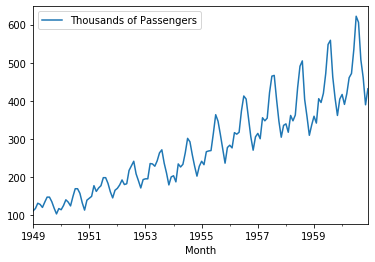

In [2]:
df1.plot()

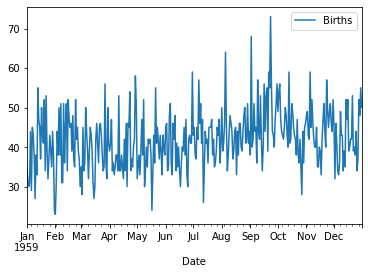

In [3]:
df2.plot()

In [4]:
from statsmodels.tsa.stattools import adfuller

In [13]:
adfuller(df1['Thousands of Passengers'])[1]

0.9918802434376411

In [16]:
adfuller(df2['Births'], autolag='t-stat')

(-4.808291253559765,
 5.2434129901498554e-05,
 6,
 358,
 {'1%': -3.448748905151901,
  '5%': -2.8696473721448728,
  '10%': -2.5710891239349585},
 3.2939539781817326)

In [17]:
adfuller(df2['Births'], autolag='AIC')

(-4.808291253559765,
 5.2434129901498554e-05,
 6,
 358,
 {'1%': -3.448748905151901,
  '5%': -2.8696473721448728,
  '10%': -2.5710891239349585},
 2343.8290926464197)

In [18]:
adfuller(df2['Births'], autolag='BIC')

(-15.2394295112876,
 5.187572355823107e-28,
 0,
 364,
 {'1%': -3.4484434475193777,
  '5%': -2.869513170510808,
  '10%': -2.571017574266393},
 2358.229022990797)

In [47]:
df3 = pd.read_csv('Data/samples.csv', index_col=0, parse_dates=True)
df3.index.freq = 'MS'

In [48]:
df3.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


In [50]:
df3.index

DatetimeIndex(['1950-01-01', '1950-02-01', '1950-03-01', '1950-04-01',
               '1950-05-01', '1950-06-01', '1950-07-01', '1950-08-01',
               '1950-09-01', '1950-10-01',
               ...
               '1959-03-01', '1959-04-01', '1959-05-01', '1959-06-01',
               '1959-07-01', '1959-08-01', '1959-09-01', '1959-10-01',
               '1959-11-01', '1959-12-01'],
              dtype='datetime64[ns]', length=120, freq='MS')

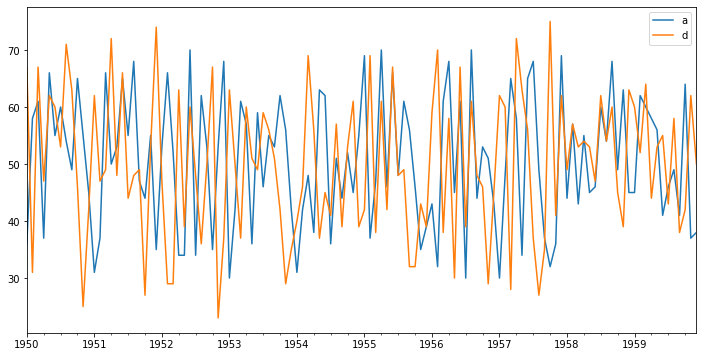

In [51]:
df3[['a','d']].plot(figsize=(12,6))

In [52]:
from statsmodels.tsa.stattools import coint

In [54]:
coint(df3['a'], df3['d'])

(-12.165610506660373,
 1.6443338408256524e-21,
 array([-3.99084033, -3.38795719, -3.08028241]))

In [55]:
from statsmodels.tsa.stattools import grangercausalitytests

In [58]:
grangercausalitytests(df3[['a','d']], maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


In [67]:
grangercausalitytests(df3[['b','c']], maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=38.5133 , p=0.0000  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=39.5094 , p=0.0000  , df=1
likelihood ratio test: chi2=34.1161 , p=0.0000  , df=1
parameter F test:         F=38.5133 , p=0.0000  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=24.9899 , p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=52.1912 , p=0.0000  , df=2
likelihood ratio test: chi2=43.2161 , p=0.0000  , df=2
parameter F test:         F=24.9899 , p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=11.1712 , p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=35.6464 , p=0.0000  , df=3
likelihood ratio test: chi2=31.1162 , p=0.0000  , df=3
parameter F test:         F=11.1712 , p=0.0000  , df_denom=110, df_num=3


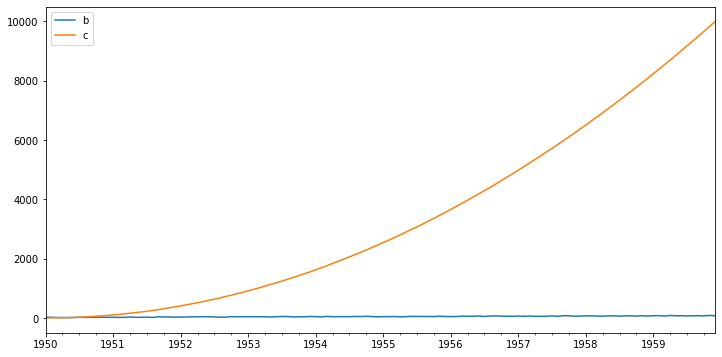

In [75]:
df3[['b','c']].plot(figsize=(12,6))